<a href="https://colab.research.google.com/github/dmswl0707/Sodescar/blob/eunji/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_reservation_triplog.csv')
data.tail()

,reservation_id,car_id,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng,trip
751543,25230734,12133,EfUz3ev4ykYFkJ6t4Eg4ML5fkur2s8Rg/LqDEdZTxpo=,서울특별시 성북구,2019-08-16 17:58:45,2019-08-16 14:50:00,27,male,2019-06-09,4756.0,True,미니클럽맨,서울 돌곶이역[V],서울 성북구 석관동 245-4,37.610798,127.058172,NaN,NaN,NaN,NaN,NaN,NaN
751544,25230739,16346,isNozhU/SlfjlXncrzi20TgQEev2hiSf+JH/13Vzt1Y=,경기도 의정부시,2019-08-16 20:29:58,2019-08-15 21:40:00,31,male,2018-03-09,10799.0,False,올뉴K3,AJ파크 의정부 센트럴타워,경기 의정부시 의정부동 494 센트럴타워,37.738066,127.044092,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN,NaN,"경기도 양주시,경기도 고양시 일산서구,경기도 양주시,경기도 고양시 일산서구"
751545,25230740,18217,DBVfEBiHB2Fq4PgtorxeD6SKjkvP+yeofER1mjQ6OD0=,서울특별시 강남구,2019-08-16 00:39:36,2019-08-15 22:00:00,28,male,2015-06-10,9080.0,False,더뉴레이,대승주차장,서울 강남구 대치동 984-12,37.500908,127.066643,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,NaN,NaN,서울특별시 노원구
751546,25230763,8420,2akRtQ2yPc0zFkPX1EGe72+tJPXrOhFKHmlOiwiwYY0=,서울특별시 강서구,2019-08-16 04:39:18,2019-08-15 21:40:00,21,male,2016-08-04,932.0,False,넥스트스파크,삼영주차장,서울 강서구 화곡동 110-65,37.543930,126.843872,LIVING_VILLA,LIVING_ETC,ETC,NaN,NaN,"인천광역시 중구,서울특별시 강서구,서울특별시 영등포구,서울특별시 강서구"
751547,25230776,18322,pKyxVpBU8+VcqT/J4ZLxYLHGBR3T7rH636FQuFbhWwo=,서울특별시 성북구,2019-08-16 20:47:34,2019-08-16 16:30:00,38,male,2016-10-13,27556.0,False,더뉴레이,삼선교주차장,서울 성북구 삼선동4가 18-6,37.588623,127.010368,LIVING_ETC,COMMERCIAL_OFFICE,ETC,NaN,NaN,"서울특별시 중구,서울특별시 광진구"


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751548 entries, 0 to 751547
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reservation_id           751548 non-null  int64  
 1   car_id                   751548 non-null  int64  
 2   member_id_encrypted      751548 non-null  object 
 3   region                   751548 non-null  object 
 4   reservation_return_at    751548 non-null  object 
 5   reservation_start_at     751548 non-null  object 
 6   member_age               751548 non-null  int64  
 7   member_gender            699017 non-null  object 
 8   member_created_date      751548 non-null  object 
 9   member_total_distance    738010 non-null  float64
 10  is_vroom                 751548 non-null  bool   
 11  car_name                 751548 non-null  object 
 12  zone_name                750774 non-null  object 
 13  zone_address             751548 non-null  object 
 14  zone

In [117]:
# 결측치 제거
data = data.dropna()

In [118]:
data = data.drop(['reservation_id', 'zone_address', 'car_id', 'zone_name', 'zone_lat', 'zone_lng', 'reservation_created_lat', 'reservation_created_lng'], 1)
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data.head()

,member_id_encrypted,region,reservation_return_at,reservation_start_at,member_age,member_gender,member_created_date,member_total_distance,is_vroom,car_name,zone_type1,zone_type2,zone_type3,trip
0,Bs6zFqRPD1zImennBpeXaP8NE6d+DzBq5Z8mtuC0eR4=,서울특별시 강남구,2019-08-23 23:42:19,2019-08-23 22:00:00,30,male,2018-08-04,5284.0,False,더뉴아반떼,LIVING_APT,LIVING_ETC,TRANSFER_BUS,서울특별시 광진구
1,8wu5HZqMAjq6mrjeYaeEU03i5ENRFIkCNjMCk40sTp0=,경기도 남양주시,2019-09-10 15:59:47,2019-09-09 11:20:00,49,female,2015-05-08,25840.0,False,티볼리(경유),LIVING_APT,TRANSFER_BUS,ETC,"경기도 양평군,경기도 이천시,경기도 남양주시,경기도 성남시 분당구,경기도 성남시 분..."
2,Yw8DGmJuWBDbCiM+ujwevwwkKAyjtxUfMCMhrR4huOY=,부산광역시 강서구,2019-11-13 20:28:32,2019-11-13 14:30:00,42,female,2019-11-12,881.0,False,쏘나타 뉴라이즈(LPG),TRANSFER_STATION,TRANSFER_SUBWAY,ETC,"부산광역시 서구,부산광역시 서구,부산광역시 해운대구"
3,WdKljc1HSkWe7OwZMuC8evJ4S5nHIDl0d/k+RkzJW6A=,경기도 고양시 일산동구,2019-10-21 00:07:38,2019-10-20 12:10:00,37,male,2016-11-28,16509.0,True,레이,LIVING_APT,ETC,ETC,"경기도 파주시,경기도 파주시,경기도 파주시,경기도 고양시 덕양구"
4,cphO88t5MCrnOginrtHC2rytMk8HhgwEufcptPmCl6I=,경기도 안양시 동안구,2019-10-12 19:00:00,2019-10-09 07:00:00,34,female,2015-08-19,2569.0,False,올뉴모닝,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,"경기도 안양시 동안구,경기도 안양시 동안구,경기도 안양시 동안구,경기도 고양시 일산..."


# 1. 유저 정보
- 쏘카 이용자의 75%가 40세 이하, 평균 나이 31세 남성 운전자가 여자 운전자에 비해 4배 정도 많음
- 첫 가입 후 평균 2~3년정도 쏘카 서비스를 이용, 전체 이용자의 75% 정도가 10시간 이내 가량 이용함
- 전체 이용자의 75%가 6500km 정도 주행


In [119]:
# 임의의 컬럼 분석(나이 분포)
# 전체 연령의 50% 정도가 29세 정도
data['member_age'].describe()

count    124755.000000
mean         31.686089
std           8.815163
min          21.000000
25%          25.000000
50%          29.000000
75%          37.000000
max          78.000000
Name: member_age, dtype: float64

(array([5.8954e+04, 3.1463e+04, 1.7250e+04, 1.0798e+04, 4.7460e+03,
        1.2750e+03, 2.5400e+02, 1.5000e+01]),
 array([21.   , 28.125, 35.25 , 42.375, 49.5  , 56.625, 63.75 , 70.875,
        78.   ]),
 <a list of 8 Patch objects>)

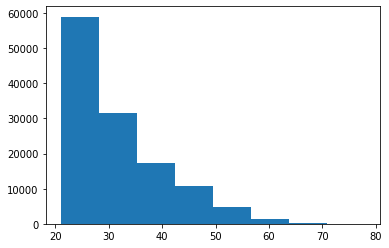

In [120]:
plt.hist(data['member_age'], bins=8)

In [121]:
# 남자 이용자가 여자 이용자의 4배 가량 많음
data['member_gender'].describe()

count     124755
unique         2
top         male
freq       97758
Name: member_gender, dtype: object

(array([97758., 26997.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

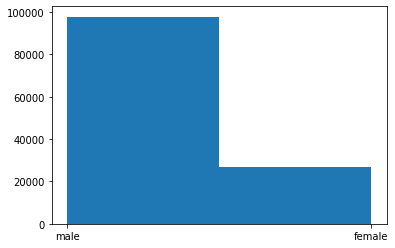

In [122]:
plt.hist(data['member_gender'], bins=2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

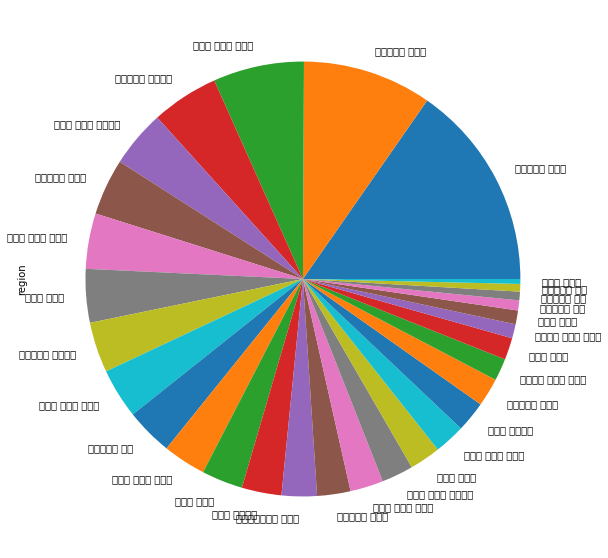

In [143]:
data['region'].value_counts(normalize=True).plot(kind='pie', figsize=(15,10))

In [123]:
data['reservation_start_at'] = pd.to_datetime(data['reservation_start_at'])
data['reservation_return_at'] = pd.to_datetime(data['reservation_return_at'])

In [124]:
data['이용시간']=((data['reservation_return_at'] - data['reservation_start_at']))

In [125]:
# 전체 이용자 중의 75%가 10시간 이내
data['이용시간'].describe()

count                       124755
mean     0 days 09:49:59.687603703
std      0 days 14:35:42.425974396
min                0 days 00:13:10
25%                0 days 03:20:46
50%                0 days 05:20:49
75%                0 days 10:28:12
max               15 days 00:08:22
Name: 이용시간, dtype: object

In [126]:
data['member_created_date'] = pd.to_datetime(data['member_created_date'])
data['가입후_이용기간']=((data['reservation_start_at'] - data['member_created_date']))
#data.head()

In [127]:
# 이용자의 절반이 가입후 2년 정도 사용
data['가입후_이용기간'].describe()

count                         124755
mean     838 days 12:58:13.591920080
std      594 days 01:17:52.240760704
min                  0 days 00:30:00
25%                312 days 20:15:00
50%                787 days 10:20:00
75%               1308 days 13:30:00
max               2814 days 13:10:00
Name: 가입후_이용기간, dtype: object

In [128]:
# 이용자별 주행거리
# 평균 5000km 사용, 이용자의 75%가 6545km 이용
# id당 누적 그래프 시각화 가능하나, 큰 의미는 없어 보임
data['member_total_distance'].describe()

count    124755.000000
mean       5004.255348
std        7084.237631
min           0.000000
25%         827.000000
50%        2534.000000
75%        6545.000000
max      121163.000000
Name: member_total_distance, dtype: float64

In [129]:
# 멤버당 이용 횟수
usage_frequency_per_member = data['member_id_encrypted'].value_counts()
print(usage_frequency_per_member)
#data['usage_frequency_per_member'] = usage_frequency_per_member

MRo1KLaA/jViPznvtnLB/tHLuvX3XjHsk2dlDkiPfZM=    95
+ofceBEd7+aPZE6tmux2xNxppZMqRx4rf8Uf88sVLgI=    79
OuIBb1HQX5uBh/9gCv5q/ToOjLMh/7E1/UBXEu5rvrE=    79
MGKifPpgs6UKyZhi9LEqHKO9MckfSlKq1PPQF+QVHko=    63
xk4mrfLC8oDn8WKckTAngD4ZvbWgatwpUuk5D7bxAHo=    60
                                                ..
yZl/eFlr+kBuiziqcAlvreVcKv9y2ks8S7Ry8cN+yZ0=     1
nDiz6AQauqxz5rGRajO6n6Y0wIJX7aJ7umY4nLPPcsI=     1
l9ocqgWLxHwTwc88+mTmxTq1a0+cKSZlf8v2Cm7+xro=     1
lsmlSTz3z6yScnGUnZcq7+eens8Z17mKXLQEq4QlNKU=     1
Yd+0owgl4ix+3pcfR2W4kESfFhRJR0nShMKhATfFkXQ=     1
Name: member_id_encrypted, Length: 59907, dtype: int64


In [113]:
#딕셔너리화 해서 파이 차트로 구현
usage_frequency_dict = dict(usage_frequency_per_member)
#usage_frequency_dict

# 새로운 딕셔너리 생성 key : 횟수, value : 중복된 수
count = {}
usage_count = usage_frequency_dict.values

<built-in method values of dict object at 0x7f29d82eecd0>


- 예약 주기


# 2. Trip 정보

In [17]:
df = data[['region', 'car_name', 'zone_type1', 'zone_type2','zone_type3','trip','이용시간']]
df.tail()

,region,car_name,zone_type1,zone_type2,zone_type3,trip,이용시간
124750,서울특별시 강서구,[쏘카세이브] 넥스트스파크,LIVING_VILLA,LIVING_ETC,ETC,"서울특별시 강서구,서울특별시 구로구,서울특별시 금천구,경기도 하남시",0 days 05:52:10
124751,서울특별시 동대문구,더뉴레이,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,서울특별시 중구,0 days 09:59:04
124752,서울특별시 강남구,스토닉,LIVING_VILLA,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,"서울특별시 강남구,서울특별시 강남구,서울특별시 강남구,경기도 양주시,경기도 파주시,...",0 days 10:49:23
124753,경기도 고양시 일산서구,올뉴모닝,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,"경기도 고양시 일산서구,경기도 파주시,경기도 파주시,경기도 안양시 동안구,경기도 안...",0 days 22:14:40
124754,서울특별시 강남구,코나,LIVING_APT,TRANSFER_BUS,ETC,"서울특별시 강남구,강원도 강릉시,강원도 속초시,강원도 양양군,강원도 홍천군,강원도 ...",1 days 15:01:09


(array([4.6836e+04, 6.7440e+03, 1.7468e+04, 1.5909e+04, 2.9224e+04,
        1.7370e+03, 0.0000e+00, 3.0430e+03, 9.2900e+02, 1.6780e+03,
        1.5900e+02, 9.7400e+02, 4.9000e+01, 5.0000e+00]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ,  6.85714286,  7.71428571,
         8.57142857,  9.42857143, 10.28571429, 11.14285714, 12.        ]),
 <a list of 14 Patch objects>)

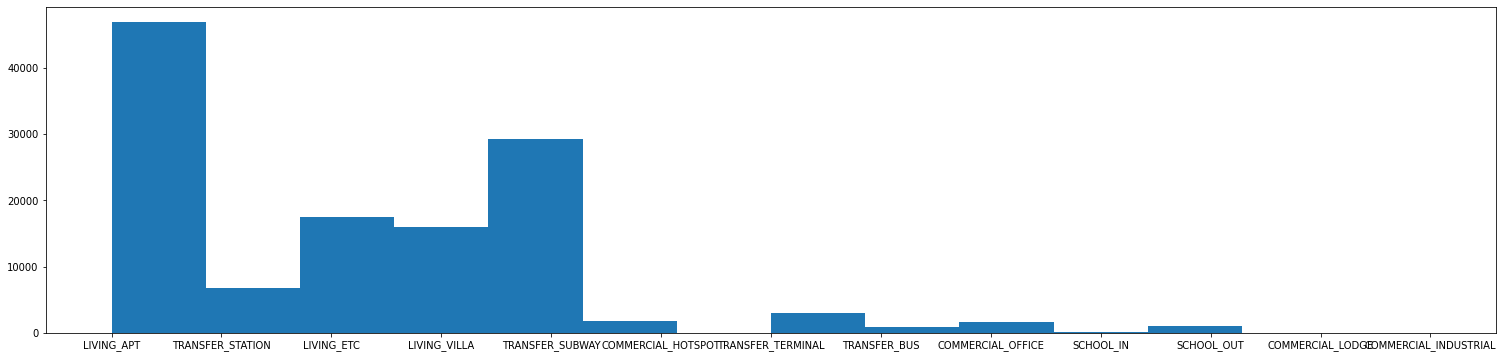

In [18]:
# 사용자가 이용하는 존 타입 유형 3
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type1'], bins=14)

(array([15783.,  7273., 22847.,  8194., 20700., 25055.,     0.,  5714.,
        12023.,  2912.,  1853.,  1512.,   738.,   151.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ,  6.85714286,  7.71428571,
         8.57142857,  9.42857143, 10.28571429, 11.14285714, 12.        ]),
 <a list of 14 Patch objects>)

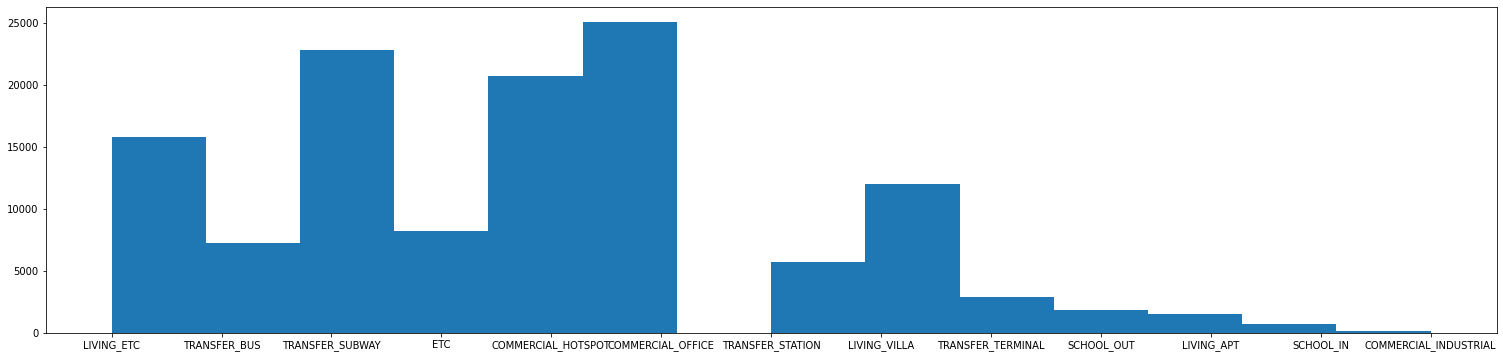

In [19]:
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type2'], bins=14)

(array([ 2824., 41566., 50910.,  6327.,  9074.,  4539.,  3278.,   592.,
         2039.,  1393.,   572.,   250.,   539.,   852.]),
 array([ 0.        ,  0.92857143,  1.85714286,  2.78571429,  3.71428571,
         4.64285714,  5.57142857,  6.5       ,  7.42857143,  8.35714286,
         9.28571429, 10.21428571, 11.14285714, 12.07142857, 13.        ]),
 <a list of 14 Patch objects>)

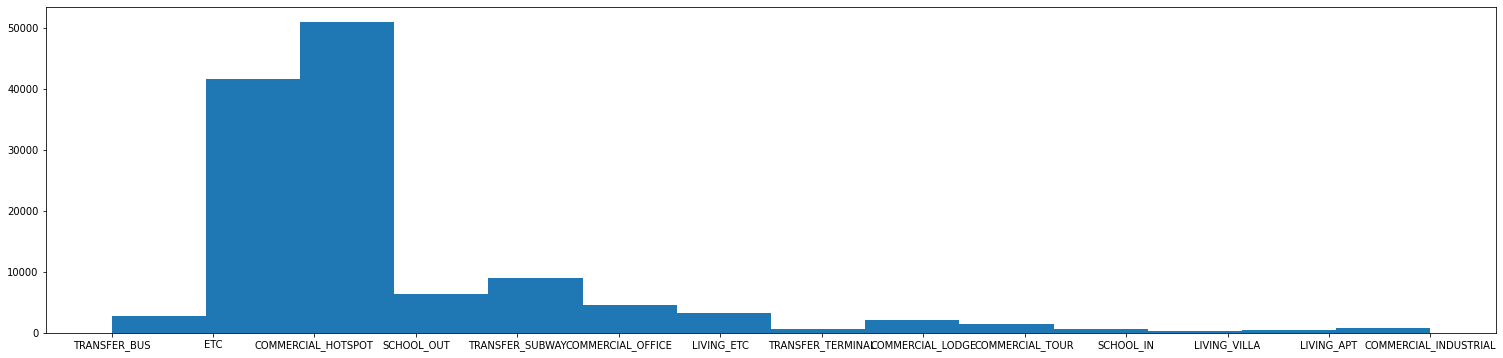

In [20]:
plt.figure(figsize=(26, 6))
plt.hist(data['zone_type3'], bins=14)

In [21]:
data.shape

(124755, 21)

In [22]:
# train 부분은 80%, test 부분은 20%
train = data[:670000]
test = data[67000:]

In [ ]:
x_train = np.asarray()
y_train = np.asarray()
x_test = np.asarray()
y_test = np.asarray()